In [7]:
%matplotlib inline
import pandas as pd
import datetime as dt
import numpy as np

In [8]:
def readDataasDF(file_path):
    df = pd.read_csv(file_path, header=None)
    df.rename(columns={0: 'label'}, inplace=True)
    return df

class Bound:
    def __init__(self, df):
        self.tmax = df.columns.values[df.columns!='label'].max()
        self.tmin = df.columns.values[df.columns!='label'].min()
        self.xmax = df.max().max()
        self.xmin = df.min().min()

    def setRowsAndCols(self, rows, cols):
        self.rows = rows
        self.cols = cols
        
class NN:
    def __init__(self):
        self.TS = -1
        self.Jac = -1
        self.label = ''

In [9]:
sigma = 0.18
epsilon = 21

In [22]:
D = readDataasDF('CinC_ECG_torso\\CinC_ECG_torso_TRAIN')
Q = readDataasDF('CinC_ECG_torso\\CinC_ECG_torso_TEST')

In [23]:
D.label.unique()

array([1, 3, 4, 2], dtype=int64)

In [63]:
D1 = D[D.label==1]
D1 = D1.loc[:,D1.columns!='label']
print(len(D1.columns))

1639


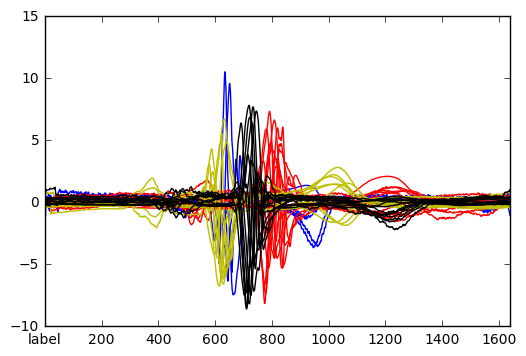

In [84]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
styles = ['b-','r-','y-','k-']
for i, style in zip(D.label.unique(), styles):
    D[D.label==i].transpose().plot(legend=False, style=style, ax=ax)
    
fig.savefig('all.png')

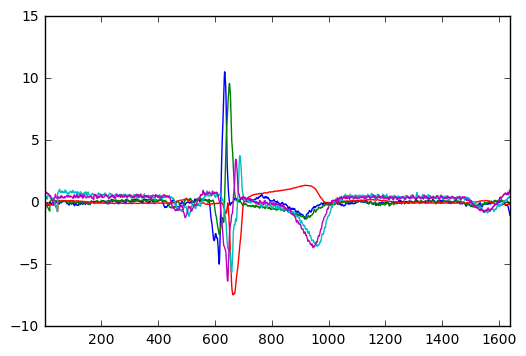

In [69]:
plt1 = D1.transpose().plot(legend=False, kind='line')
plt1.get_figure().savefig('fig_1.png')

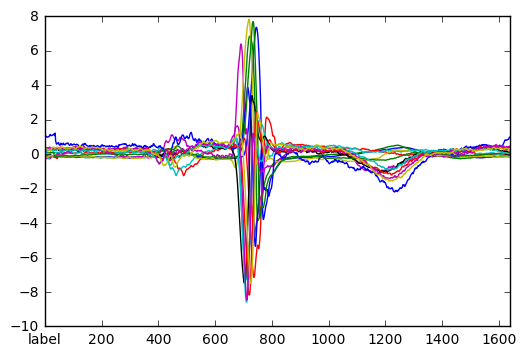

In [66]:
plt2 = D[D.label==2].transpose().plot(legend=False)
plt2.get_figure().savefig('fig_2.png')

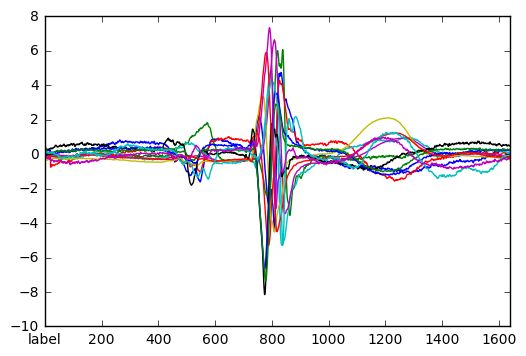

In [67]:
plt3 = D[D.label==3].transpose().plot(legend=False)
plt3.get_figure().savefig('fig_3.png')